## Análisis descriptivo, limpieza de datos y medidas de tendencia central del conjunto de datos Titanicic

In [1]:
# IMPORTACIÓN DE LIBRERÍAS

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# LECTURA DE TABLA

ruta = "C:/Users/Julian/Documents/Ejecicios del botcamp/titanic.csv"
titanic = pd.read_csv(ruta)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# TAMAÑO DE LA TABLA

titanic.shape, titanic.size

((891, 12), 10692)

In [4]:
# INFORMACIÓN COLUMNAS 

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Los formatos están bien pero la edad la pasaré a en entero. 

In [6]:
# ESTADISTICAS GENERALES

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# CONTEO DE NULOS

titanic.isna().sum().sort_values(ascending = False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

- Cabin tiene demasiados nulos si los elimino quedará muy poble el df, mejor elimino la columna porque si imputo por la moda quedará muy desbalanceado. 

In [10]:
# IMPUTAR EDAD Y EMBARKED

titanic["Age"] = titanic["Age"].fillna(30).astype(int)
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [16]:
# BORRAR COLUMNA CABIN 
print(f"Los datos de la tabla ahora eran: {titanic.size}")
titanic.drop(columns = "Cabin", axis = 1, inplace = True)
print(f"Los datos de la tabla ahora son: {titanic.size}")

Los datos de la tabla ahora eran: 10692
Los datos de la tabla ahora son: 9801


In [18]:
# NUEVA INFO

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB


In [76]:
# CÁLCULO DE NULOS LUEGO DE LA LIMPIEZA

titanic.isna().sum().sort_values(ascending = False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [78]:
# MEDIDAS DE TENDENCIA CENTRAL

media_edad = titanic["Age"].mean()
mediana_edad = titanic["Age"].median()
moda_edad = titanic["Age"].mode()
media_fare = titanic["Fare"].mean()
mediana_fare = titanic["Fare"].median()
moda_fare = titanic["Fare"].mode()

datos = {"Medias": [media_edad, media_fare],"Medianas":[mediana_edad, mediana_fare]}

medidas = pd.DataFrame(datos, index = ["Edad","tarifa"])
medidas

,Medias,Medianas
Edad,29.742985,30.0000
tarifa,32.204208,14.4542


In [48]:
# MODAS DE EDAD Y FARE 

moda_edad, moda_fare

(0    30
 Name: Age, dtype: int32,
 0    8.05
 Name: Fare, dtype: float64)

In [52]:
# DESCRIPTIVO DE TODAS LAS COLUMNAS 

titanic.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.742985,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.011583,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,30.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


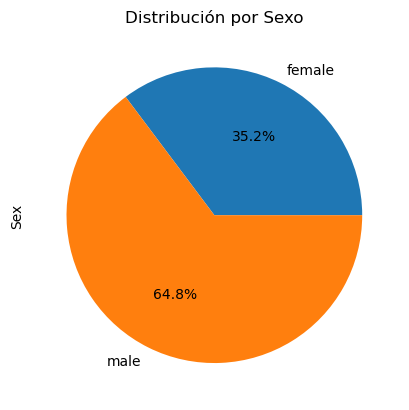

In [64]:
# ALÁLISIS POR SEXO

sexo = titanic.groupby("Sex")["Sex"].count()
sexo.plot(kind= "pie", autopct='%1.1f%%', title='Distribución por Sexo');

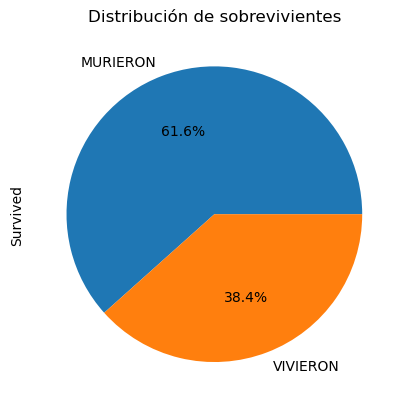

In [80]:
# ALÁLISIS POR SUPERVIVIENTES

sexo = titanic.groupby("Survived")["Survived"].count()
sexo.plot(kind= "pie", autopct='%1.1f%%', title='Distribución de sobrevivientes', labels=['MURIERON', 'VIVIERON']);

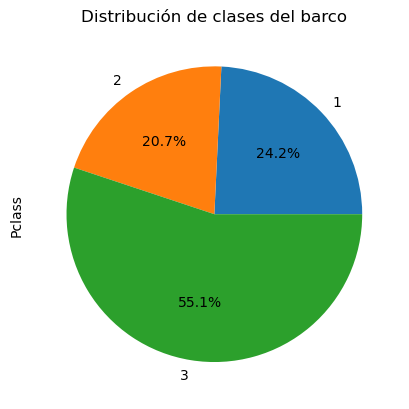

In [72]:
# ALÁLISIS POR CLASE

sexo = titanic.groupby("Pclass")["Pclass"].count()
sexo.plot(kind= "pie", autopct='%1.1f%%', title='Distribución de clases del barco');

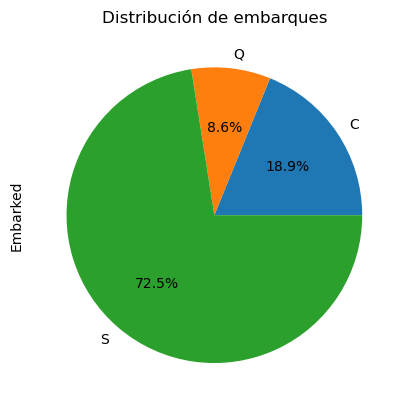

In [82]:
# ANÁLISIS POR EMBARKED

embarque = titanic.groupby("Embarked")["Embarked"].count()
embarque.plot(kind= "pie", autopct='%1.1f%%', title='Distribución de embarques');

In [ ]:
limpio = pd.